In [1]:
import os
import copy
import numpy as np
import networkx as nx

from datetime import datetime
import matplotlib.pyplot as plt 
from tqdm import tqdm

import scipy
from scipy.sparse.linalg import eigsh

from init_graph import *
import peeling
import utils
import LL_optimization

In [2]:
save_source_path = "/esat/augustijn1/scratch/ekariota/Figures/LL_OQC_icassp26/"
save_=0

In [3]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

plt.rcParams["figure.dpi"]=100
plt.rcParams['savefig.dpi']=300

sns.set_theme(style="whitegrid")
sns.set_style({"axes.facecolor": ".98"})

colors = sns.color_palette("muted", 7)
# markers = ['o','s','p','^','<','>','v','P','X']


In [4]:
# dataset_name = "facebook_combined"

dataset_name = "github"
# dataset_name = "web-Stanford"
# dataset_name = 'caidaRouterLevel'

source_path = "../datasets/"
G = init_graph(dataset_name, source_path)

In [5]:
print(G)
n = G.number_of_nodes()
m = G.number_of_edges()

Graph with 37700 nodes and 289003 edges


In [15]:
A = nx.adjacency_matrix(G).astype(float)


In [6]:
logs_save_path = "/esat/augustijn1/scratch/ekariota/python_scripts/LL_OQC_icassp26/logs/"

In [7]:
# alpha_ = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# alpha_ = [0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
# alpha_ = [0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
# alpha_ = [ 0.92, 0.93, 0.94, 0.95, 0.96]
# alpha_ = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
# alpha_ = [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

# alpha_ = [0.6, 0.7, 0.8, 0.9, 0.91, 0.93, 0.95, 0.97, 0.99]
alpha_ = [0.7, 0.8, 0.9, 0.93, 0.97]
# alpha_ = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.93, 0.95]


In [8]:
max_iters = 20
initialization='S_oh'
density_type='avg_deg'

In [9]:
dir_path = logs_save_path+dataset_name+'/'

result_ = []
fun_values_vec_ = []
is_binary_vec_ = []
selected_nodes_ = []
OQC_density_ = []
avg_deg_density_ = []
num_of_nodes_ = []
x0_ = []
GreedyOQC_indicator_ = []
GreedyOQC_density_ = []
delta_vec_ = []
GreedyOQC_delta_ = []
error_from_binary_ = []
for alpha in alpha_:
    load_path = dir_path+dataset_name+'_alpha'+'{:.2f}'.format(alpha)
    load_path = load_path+'_'+initialization
    if initialization=='S_oh':
        load_path = load_path+'_'+density_type
    load_path = load_path + '_iters'+str(max_iters)+'_log.npy'

    variables_dict = np.load(load_path, allow_pickle=True)

    result = variables_dict.item().get('result')
    fun_values_ = variables_dict.item().get('fun_values_')
    is_binary_ = variables_dict.item().get('is_binary_')
    selected_nodes = variables_dict.item().get('selected_nodes')
    OQC_density = variables_dict.item().get('OQC_density')
    avg_deg_density = variables_dict.item().get('avg_deg_density')
    num_of_nodes = variables_dict.item().get('num_of_nodes')
    x0 = variables_dict.item().get('x0')
    GreedyOQC_indicator = variables_dict.item().get('GreedyOQC_indicator')
    GreedyOQC_density = variables_dict.item().get('GreedyOQC_density')
    
    result_.append(result)
    fun_values_vec_.append(fun_values_)
    is_binary_vec_.append(is_binary_)
    selected_nodes_.append(selected_nodes)
    OQC_density_.append(OQC_density)
    avg_deg_density_.append(avg_deg_density)
    num_of_nodes_.append(num_of_nodes)
    x0_.append(x0)
    GreedyOQC_indicator_.append(GreedyOQC_indicator)
    GreedyOQC_density_.append(GreedyOQC_density)

    delta_ = np.array(fun_values_) / (num_of_nodes*(num_of_nodes-1)/2) + alpha
    delta_vec_.append(delta_)

    GreedyOQC_num_of_nodes = GreedyOQC_indicator.sum().item()
    GreedyOQC_delta = GreedyOQC_density / (GreedyOQC_num_of_nodes*(GreedyOQC_num_of_nodes-1)/2) + alpha
    GreedyOQC_delta_.append(GreedyOQC_delta)

    error_from_binary_.append(utils.error_from_binary(result.x, n))

In [10]:
max_iters = 20
initialization_2='S_greedy'
density_type_2='avg_deg'

In [11]:
dir_path = logs_save_path+dataset_name+'/'

result_2_ = []
fun_values_vec_2_ = []
is_binary_vec_2_ = []
selected_nodes_2_ = []
OQC_density_2_ = []
avg_deg_density_2_ = []
num_of_nodes_2_ = []
x0_2_ = []
GreedyOQC_indicator_2_ = []
GreedyOQC_density_2_ = []
delta_2_vec_ = []
GreedyOQC_delta_2_ = []
error_from_binary_2_ = []
for alpha in alpha_:
    load_path = dir_path+dataset_name+'_alpha'+'{:.2f}'.format(alpha)
    load_path = load_path+'_'+initialization_2
    if initialization_2=='S_oh':
        load_path = load_path+'_'+density_type_2
    load_path = load_path + '_iters'+str(max_iters)+'_log.npy'

    variables_dict = np.load(load_path, allow_pickle=True)

    result = variables_dict.item().get('result')
    fun_values_ = variables_dict.item().get('fun_values_')
    is_binary_ = variables_dict.item().get('is_binary_')
    selected_nodes = variables_dict.item().get('selected_nodes')
    OQC_density = variables_dict.item().get('OQC_density')
    avg_deg_density = variables_dict.item().get('avg_deg_density')
    num_of_nodes = variables_dict.item().get('num_of_nodes')
    x0 = variables_dict.item().get('x0')
    GreedyOQC_indicator = variables_dict.item().get('GreedyOQC_indicator')
    GreedyOQC_density = variables_dict.item().get('GreedyOQC_density')
    
    result_2_.append(result)
    fun_values_vec_2_.append(fun_values_)
    is_binary_vec_2_.append(is_binary_)
    selected_nodes_2_.append(selected_nodes)
    OQC_density_2_.append(OQC_density)
    avg_deg_density_2_.append(avg_deg_density)
    num_of_nodes_2_.append(num_of_nodes)
    x0_2_.append(x0)
    GreedyOQC_indicator_2_.append(GreedyOQC_indicator)
    GreedyOQC_density_2_.append(GreedyOQC_density)

    delta_2_ = np.array(fun_values_) / (num_of_nodes*(num_of_nodes-1)/2) + alpha
    delta_2_vec_.append(delta_2_)

    GreedyOQC_num_of_nodes = GreedyOQC_indicator.sum().item()
    GreedyOQC_delta_2 = GreedyOQC_density / (GreedyOQC_num_of_nodes*(GreedyOQC_num_of_nodes-1)/2) + alpha
    GreedyOQC_delta_2_.append(GreedyOQC_delta_2)

    error_from_binary_2_.append(utils.error_from_binary(result.x, n))

In [12]:
save_=0

/tmp/ipykernel_122673/3366089943.py:90: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


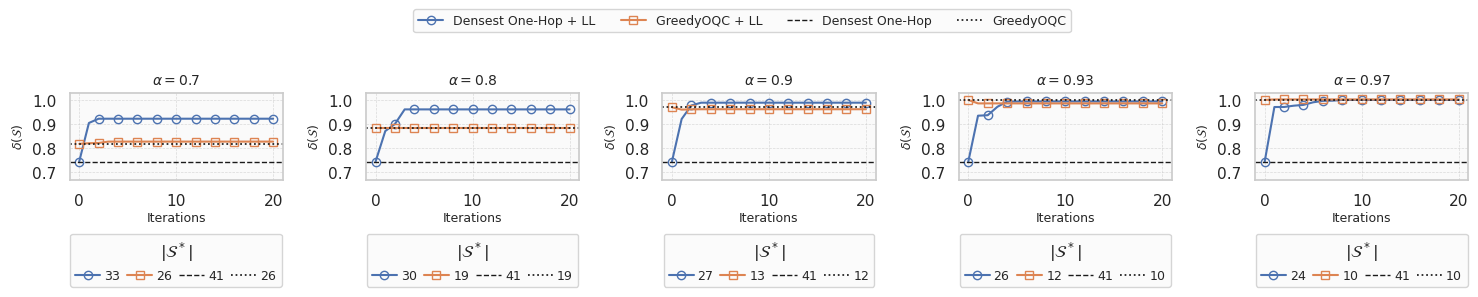

In [17]:
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

# fig, axes = plt.subplots(1, 5, figsize=(15, 2), constrained_layout=True)  
fig, axes = plt.subplots(1, 5, figsize=(15, 3.5), constrained_layout=True)  
axes = axes.flatten()  # flatten to 1D array for easier indexing

markevery=2

for i in range(5):
    ax = axes[i]
    alpha = alpha_[i]
    # alpha_onehop = alpha_onehop_[i]

    ### 1 Densest One-Hop (Avg-Deg Density)
    x0 = x0_[i]
    GreedyOQC_indicator = GreedyOQC_indicator_[i]
    GreedyOQC_density = GreedyOQC_density_[i]
    fun_values_ = fun_values_vec_[i]
    num_of_nodes = num_of_nodes_[i]
    delta_ = delta_vec_[i]
    GreedyOQC_delta = GreedyOQC_delta_[i]
    ### 2 GreedyOQC
    x0_2 = x0_2_[i]
    GreedyOQC_indicator_2 = GreedyOQC_indicator_2_[i]
    GreedyOQC_density_2 = GreedyOQC_density_2_[i]
    fun_values__2 = fun_values_vec_2_[i]
    num_of_nodes_2 = num_of_nodes_2_[i]
    delta_2_ = delta_2_vec_[i]
    GreedyOQC_delta_2 = GreedyOQC_delta_2_[i]


    x0_num_of_nodes = x0.sum().item()
    x0_delta = LL_optimization.f_a(x0, A, alpha) / (x0_num_of_nodes*(x0_num_of_nodes-1)/2) + alpha

    x0_2_num_of_nodes = x0_2.sum().item()
    x0_2_delta = LL_optimization.f_a(x0_2, A, alpha) / (x0_2_num_of_nodes*(x0_2_num_of_nodes-1)/2) + alpha

    values = np.concatenate(([x0_delta], delta_))
    values_2 = np.concatenate(([x0_2_delta], delta_2_))


    # plot
    ax.plot(values, '-o', markerfacecolor='none', markevery=markevery, label=fr"${num_of_nodes}$")
    ax.plot(values_2, '-s', markerfacecolor='none', markevery=markevery, label=fr"${num_of_nodes_2}$")
    ax.axhline(y=x0_delta, color='k', linestyle='--', linewidth=1, label=fr"${x0_num_of_nodes}$")
    ax.axhline(y=GreedyOQC_delta, color='k', linestyle=':', linewidth=1.25, label=fr"${GreedyOQC_indicator.sum()}$")


    # ax.set_title(fr'$\alpha={alpha}$ [Solution size: ${num_of_nodes}$ nodes]', fontsize=10)
    ax.set_title(fr'$\alpha={alpha}$', fontsize=10)
    ax.set_xlabel('Iterations', fontsize=9, labelpad=2.5)
    ax.set_ylabel(r'$\delta(\mathcal{S})$', fontsize=9, labelpad=5)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # ax.legend(title=r"$|\mathcal{S}^*|$", loc=10, bbox_to_anchor=(0.5, -0.8), fontsize=9, ncol=4, columnspacing=0.5, handletextpad=0.3)
    ax.legend(title=r"$|\mathcal{S}^*|$", loc='upper center', bbox_to_anchor=(0.5, -0.55), fontsize=9, ncol=4, columnspacing=0.5, handletextpad=0.3)
    # ax.legend(title=r"$|\mathcal{S}^*|$", loc='upper center', fontsize=9, ncol=4, columnspacing=0.5, handletextpad=0.3)

    # ax.set_ylim(-0.1,1.1)
    ax.set_ylim(0.7-0.03,1.03)
    # ax.set_ylim(0.8-0.1,1.1)


    ax.set_yticks([0.7, 0.8, 0.9, 1.0])
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))



# Define custom legend handles
method_handles = [
    Line2D([0], [0], color='C0', marker='o', markerfacecolor='none', linestyle='-', label='Densest One-Hop + LL'),
    Line2D([0], [0], color='C1', marker='s', markerfacecolor='none', linestyle='-', label='GreedyOQC + LL'),
    # Line2D([0], [0], color='C2', marker='D', markerfacecolor='none', linestyle='-', label='One-Hop (Edge Density)')
    Line2D([0], [0], color='k', linestyle='--', linewidth=1, label='Densest One-Hop'),
    Line2D([0], [0], color='k', linestyle=':', linewidth=1.25, label='GreedyOQC')
]

# Place the second legend outside the loop (applies to whole fig)
fig.legend(handles=method_handles,
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.15),  # adjust vertical space
           ncol=4, 
           fontsize=9,
        #    title="Methods",
           frameon=True)



plt.tight_layout()

# # Save the figure if needed
save_folder = save_source_path + 'LL_homotopy/_final/' + dataset_name + '/'
save_path = save_folder + dataset_name + '_alphas' + '_' + initialization
save_path = save_path + '_' + density_type
save_path = save_path + '_iters'+str(max_iters)+ '_delta_vs_iters_half_half.pdf'

# save_folder = save_source_path + 'LL_homotopy/_final/' + dataset_name + '/'
# save_path = save_folder + 'legends.pdf'

if save_ == 1:
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)  # Increase DPI for better quality

plt.show()


In [82]:
save_=0

In [61]:
save_path

'/esat/augustijn1/scratch/ekariota/Figures/LL_OQC_icassp26/LL_homotopy/_final/github/legends.pdf'